## Thera Bank Personal Loan Campaign

## Objective
Thera Bank wants to explore ways of converting its  liability  customers  to  personal  loan  customers. 

The classification goal is to predict the likelihood of a liability customer buying personal loans. The target variable in this dataset is 'Personal Loan'.


## Attributes:
- ID: CustomerID
- Age: Customer's age in completedyears
- Experience: #years of professionalexperience
- Income: Annual income of the customer(000)
- ZIP Code: Home Address ZIPcode.
- Family: Family size of thecustomer
- CCAvg: Avg. spending on credit cards per month(000)
- Education: Education Level. 1: Undergrad; 2: Graduate;3:  Advanced/Professional
- Mortgage: Value of house mortgage if any.(000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign? 
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by the bank?

 Import Libraries and Load Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change directory when needed
data_path ="/content/drive/My Drive/Data/Bank_Personal_Loan_Modelling.csv"

In [ ]:
# importing data

df = pd.read_csv(data_path)
df.head()      # Show First 5 observations

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
df.dtypes        ## Most of the data types are integers

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#Negative numbmers are converted to non-negative using absolute function. Non-negative can be due to typo errors

df['Experience'] = df['Experience'].abs()

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.isnull().sum()  #No missing values in this dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Q2 - EDA

In [ ]:
df.nunique()
# unique values in each column

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

# dropping 'ID', Zipcode columns as it wont provide any insight to build a model

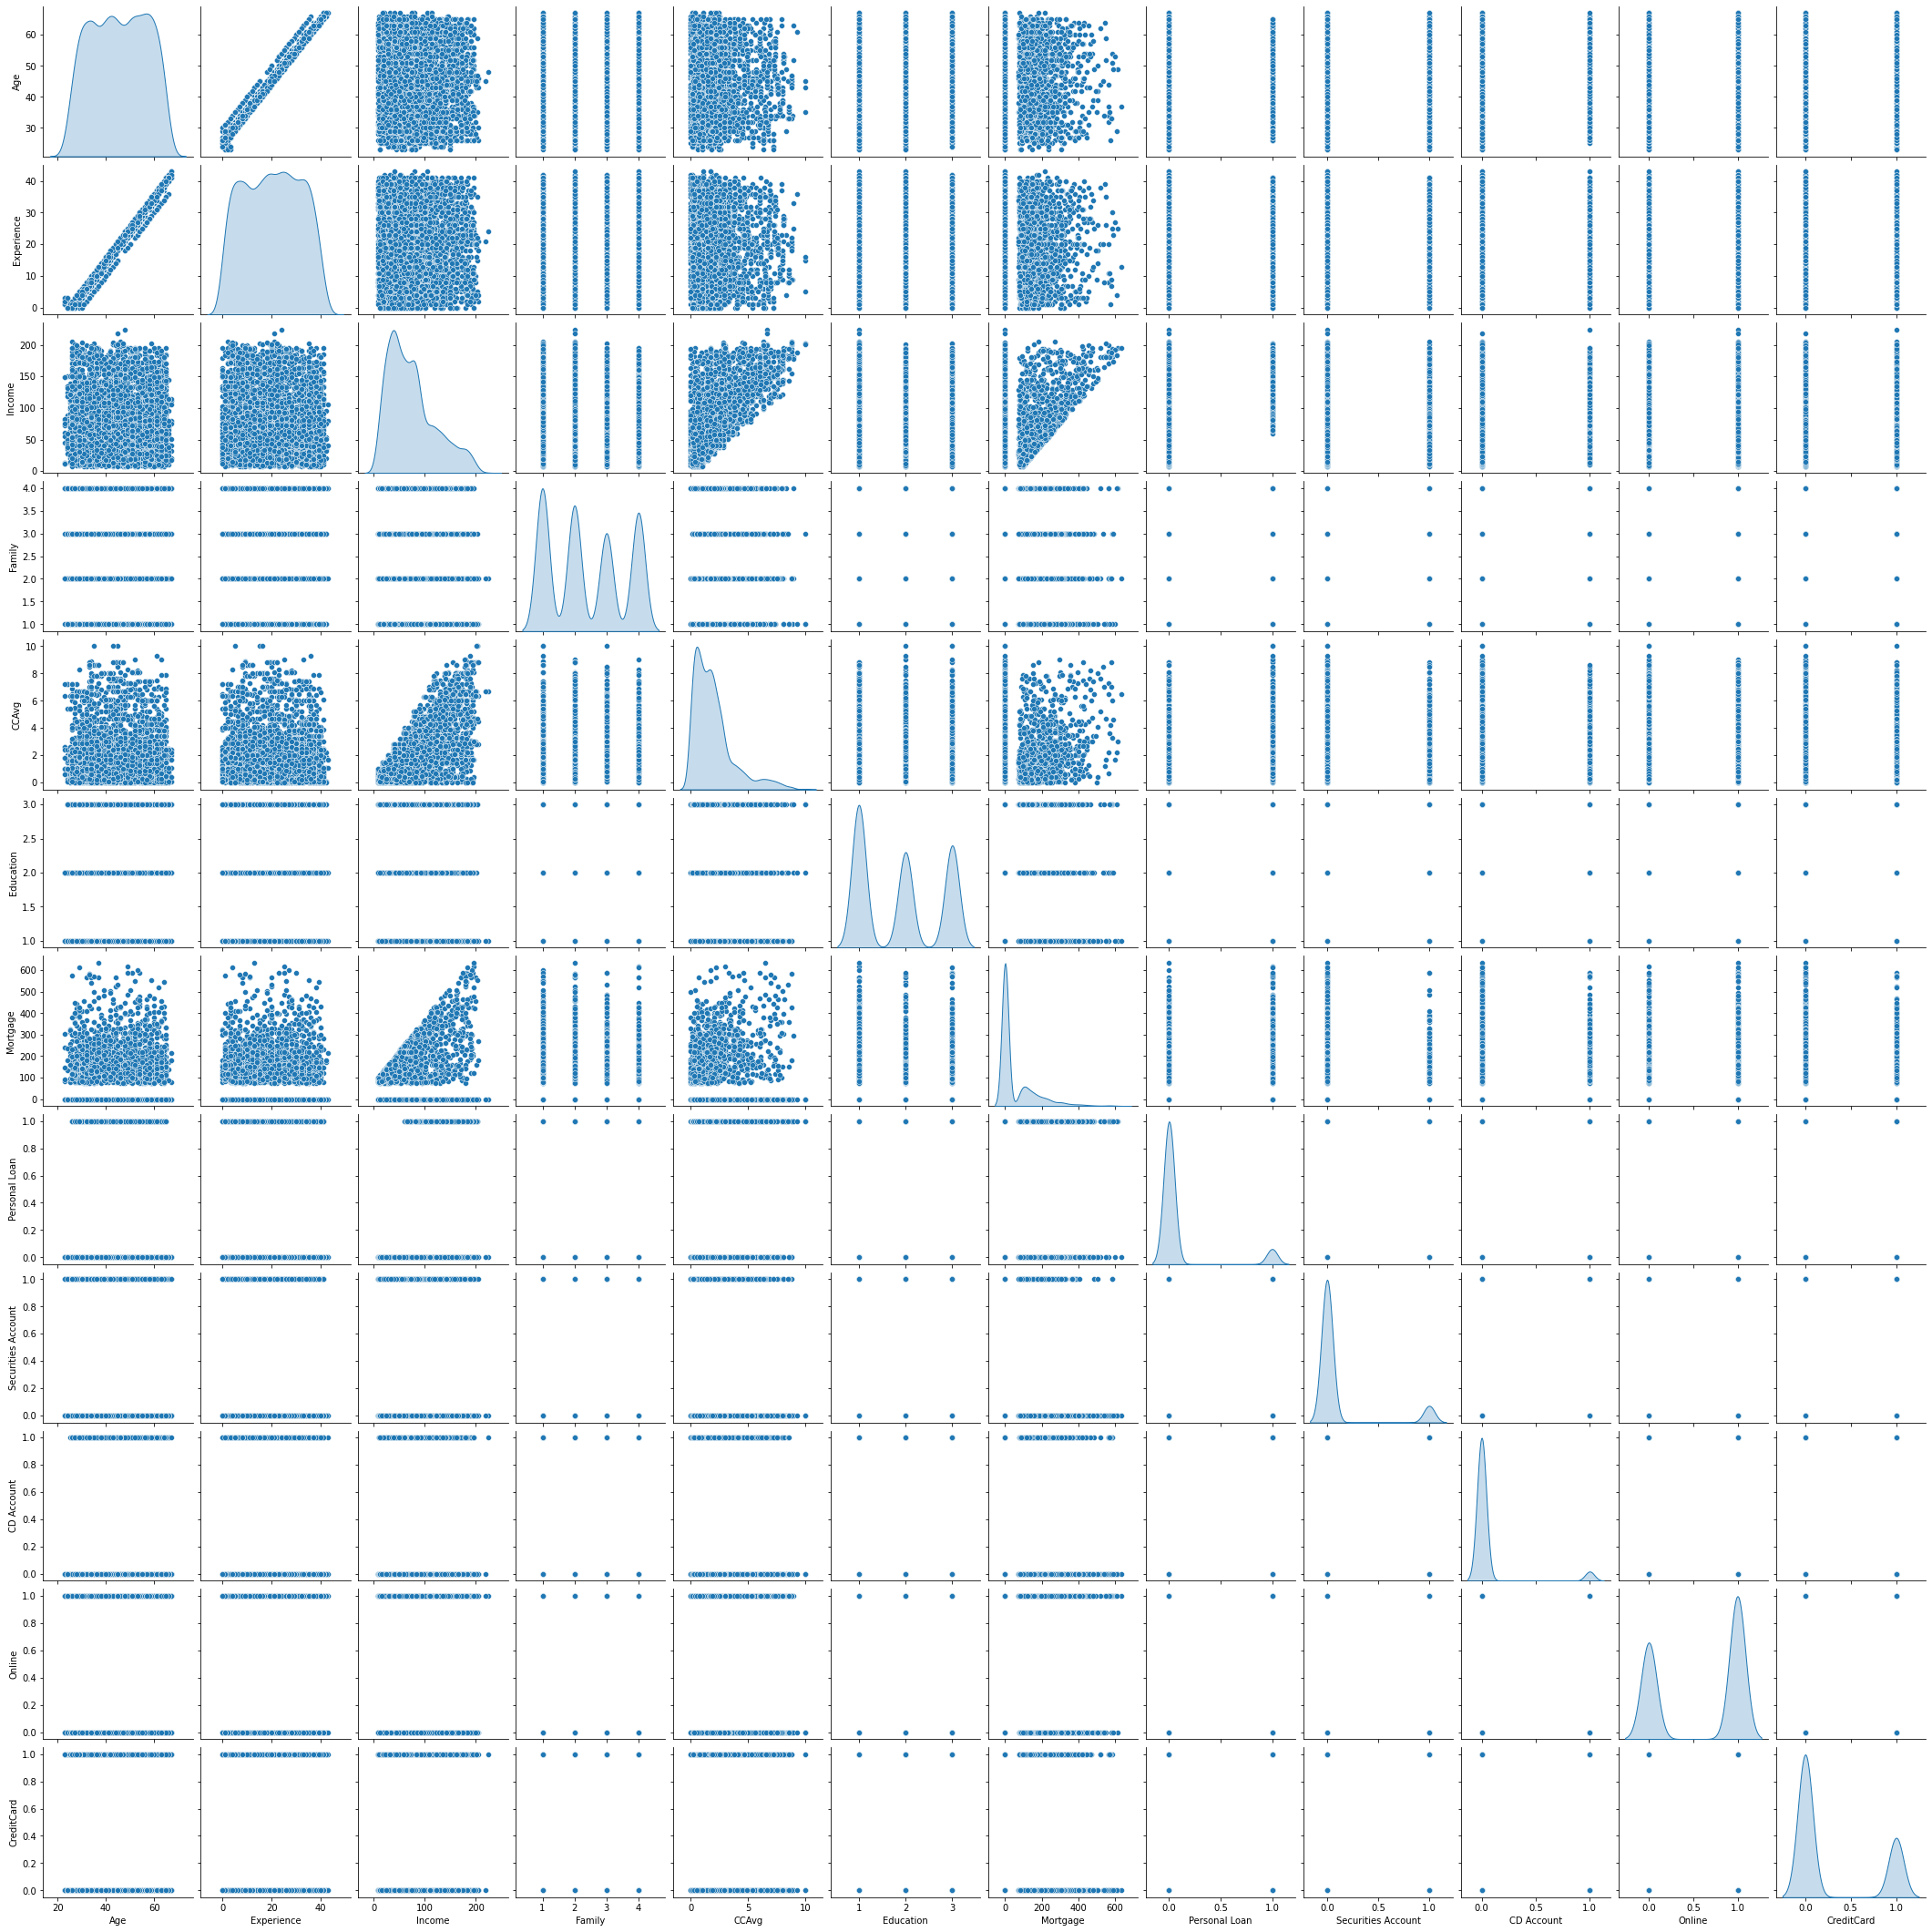

In [ ]:
sns.pairplot(df,diag_kind='kde')
plt.show()

Insights

1. Age and experience have uniform distribution and strong positive relation
2. Income is positively skewed

In [ ]:
vc = df[['Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']].sum().reset_index().rename(columns={'index':'Col_Name',0:"Value_Count_1"})
vc['Value_Count_0'] = df.shape[0] - vc['Value_Count_1']
vc

# Value counts of all the category column with two unique values (0,1)

,Col_Name,Value_Count_1,Value_Count_0
0,Personal Loan,480,4520
1,Securities Account,522,4478
2,CD Account,302,4698
3,Online,2984,2016
4,CreditCard,1470,3530


0    90.4
1     9.6
Name: Personal Loan, dtype: float64



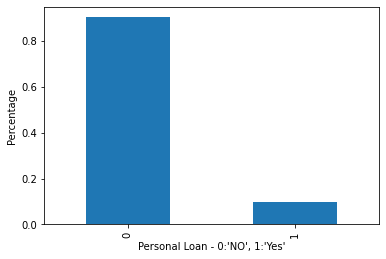

In [ ]:
print(df['Personal Loan'].value_counts(normalize=True)*100)
print()
df['Personal Loan'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Personal Loan - 0:'NO', 1:'Yes'")
plt.ylabel("Percentage")
plt.show()

In [ ]:
df[df['Mortgage']==0].shape[0]

#Most of the people don't have mortgage

3462

In [ ]:
pd.crosstab(df['Personal Loan'], df['CreditCard'],normalize='columns')

CreditCard,0,1
Personal Loan,,
0,0.904533,0.902721
1,0.095467,0.097279


`Creditcard value is same in both groups and therefore dropped

In [ ]:
df.drop('CreditCard',axis=1,inplace=True)

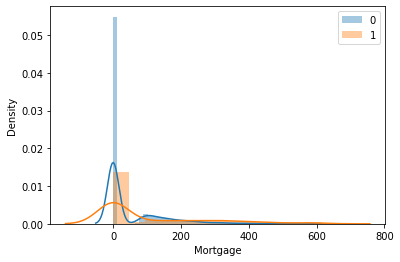

In [ ]:
sns.distplot(df[df['Personal Loan']==0]['Mortgage'],label=0)
sns.distplot(df[df['Personal Loan']==1]['Mortgage'],label=1)
plt.legend()
plt.show()

# Most people with zero motgage are not taking personal loans

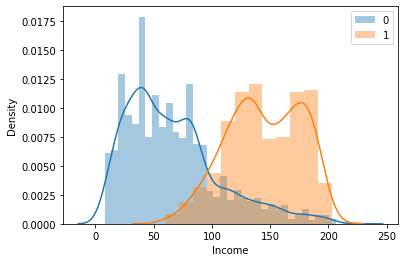

In [ ]:
sns.distplot(df[df['Personal Loan']==0]['Income'],label=0)
sns.distplot(df[df['Personal Loan']==1]['Income'],label=1)
plt.legend()
plt.show()

# Number of People with high income taking personal loan are high as compared to low income

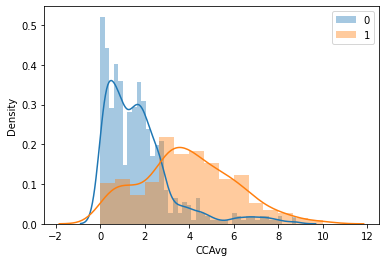

In [ ]:
sns.distplot(df[df['Personal Loan']==0]['CCAvg'],label=0)
sns.distplot(df[df['Personal Loan']==1]['CCAvg'],label=1)
plt.legend()
plt.show()

# People with high avg credit card spending per month are taking personal loans

In [ ]:
df[df['CCAvg']==0].shape[0]

#people having zero monthly spending on credit card

106

In [ ]:
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')

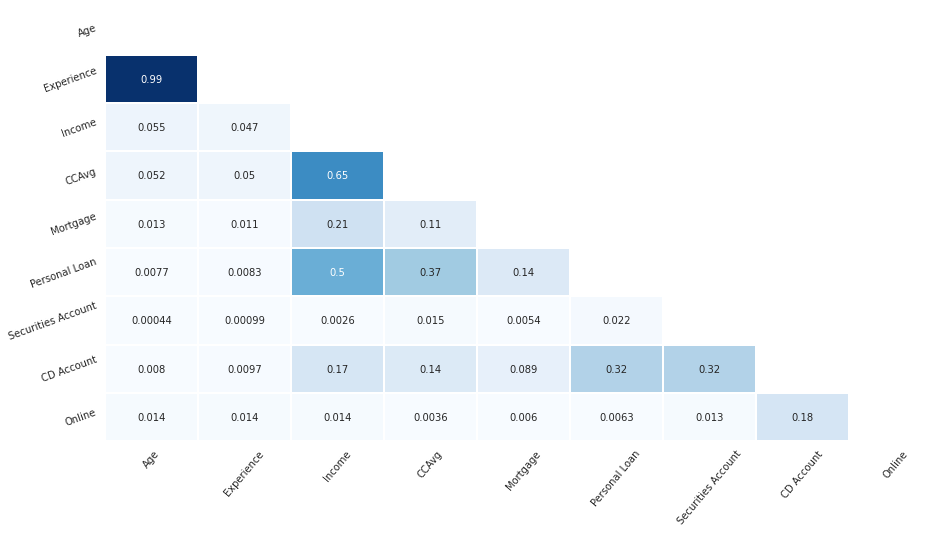

In [ ]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

Age and Experience has 0.99 correlation, Income and CCAvg have 0.65 correlation, Personal loan and Income has 0.5.

Split the data into training and test set 

In [ ]:
# Store all independent attributes in X
# Store the target column (Personal Loan) into Y array

x = df.loc[:, df.columns != 'Personal Loan']  # independent variables

y = df.loc[:, df.columns == 'Personal Loan']  # Target variable


In [ ]:
x = pd.get_dummies(x,drop_first=True)

In [ ]:
y.head()  

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [ ]:
x.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,1,49,1.6,0,1,0,0,0,0,1,0,0
1,45,19,34,1.5,0,1,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,0,1,1,0


In [ ]:
# Create the training and test data set in the ratio of 70:30respectively. 

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

# Random state seeding for reapeatability of the code

In [ ]:
xtrain.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3
717,59,34,94,0.5,0,0,0,0,0,1,0,0,0
2496,63,37,32,0.7,141,0,0,0,0,1,0,1,0
2469,43,18,89,0.1,307,0,0,0,0,0,0,1,0
1375,50,26,179,2.9,0,0,0,0,0,0,0,0,1
2742,39,14,89,0.4,0,0,0,1,1,0,0,0,0


In [ ]:
xtest.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3
3406,42,12,34,2.0,0,0,0,0,0,1,0,0,1
757,52,28,81,1.8,0,1,0,0,0,1,0,1,0
3624,58,28,70,1.4,0,0,0,0,0,0,0,0,1
4544,28,4,80,2.5,0,0,0,1,0,1,0,0,0
3235,60,35,39,1.6,0,0,0,1,1,0,0,0,1


Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(xtrain, ytrain) #training of model

LogisticRegression(random_state=7)

In [ ]:
y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",model.score(xtrain,ytrain))  # training accuracy 
print()
print("Testing accuracy",model.score(xtest, ytest))   # testing accuracy

Trainig accuracy 0.9537142857142857

Testing accuracy 0.9613333333333334


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## for evaluating model performance

In [ ]:
## confusion matrix 
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

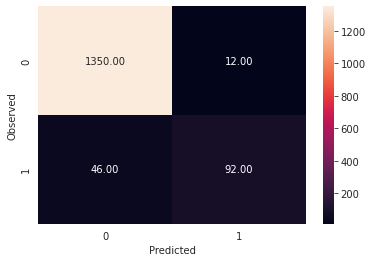

In [ ]:
draw_cm(ytest,y_predict)

** Confusion matrix means**

*True Positive (observed=1,predicted=1):* 92

Predicted Personal loan will be taken and the customer took it:

*False Positive (observed=0,predicted=1):* 12

Predicted Personal loan will be taken and the customer did not take it

*True Negative (observed=0,predicted=0):* 1350

Predicted Personal loan will not be taken and the customer did not take it

*False Negative (observed=1,predicted=0):* 46

Predicted Personal loan will not be taken and the customer took it

In [ ]:
recall_score(ytest,y_predict)

0.6666666666666666

In [ ]:
precision_score(ytest,y_predict)

0.8846153846153846

In [ ]:
f1_score(ytest,y_predict)

0.7603305785123966

In [ ]:
roc_auc_score(ytest,y_predict)

0.828928046989721

In [ ]:
# Observe the predicted and observed classes in a dataframe.

z = xtest.copy()
z['Observed Loan Status'] = ytest
z['Predicted Loan Status'] = y_predict
z[z['Observed Loan Status']!=z['Predicted Loan Status']]

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3,Observed Loan Status,Predicted Loan Status
4301,49,24,130,1.10,281,0,1,1,0,0,1,0,0,1,0
4575,53,27,115,0.50,0,0,0,0,1,0,0,0,1,1,0
78,54,30,133,2.60,0,0,0,0,1,0,0,0,1,1,0
3383,46,22,135,4.10,213,0,0,1,0,1,0,0,0,1,0
459,35,10,200,3.00,458,0,0,0,1,0,0,0,0,0,1
2304,27,2,170,4.70,0,0,0,1,0,1,0,0,0,1,0
1731,43,19,125,2.40,0,0,0,1,0,1,0,0,0,1,0
2447,44,19,201,8.80,0,0,0,1,1,0,0,0,0,0,1
1901,43,19,201,6.67,0,1,0,1,1,0,0,0,0,0,1
4154,51,25,163,1.30,0,0,0,1,1,0,0,0,1,1,0


58 rows where predicted target variable is not equal to actual target variable`

**Conclusion**


**Important Metrics**

Education, experience, CD account seems to be most important features.
Age and Mortgage doesn't play any role in predicting the target variable.

We focus on recall because our target variable is 'Personal Loan' and the bank wants more people to accept personal loan.

**Appendix**

- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **heatmap** : Draw a heatmap of rectangular data as a color-encoded matrix.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LogisticRegression** : Logistic Regression (aka logit, MaxEnt) classifier.

- **yellowbrick** : Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it  uses Matplotlib

**Acknowledgments**

I worked on this project as part of the AIML post-graduate program offered by the University of Texas, Austin.